# Perceptron Vs MLP

In this notebook, we'll compare the performance of a perceptron and MLP on a non-linear classification task. We can visually see how both the models perform in this challenge.

In this example we generate 500 samples. This random generation of points is done using random function from np module

In [1]:
x = np.random.randn(3, 2)
y_ = np.product(x, axis=1)>0

NameError: name 'np' is not defined

In [12]:
print(x)
print(y_)
-0.16470114*0.85322867

[[ 0.27384457  0.73048338]
 [ 0.00820038  1.83512414]
 [ 0.33043601 -0.96900909]]
[ True  True False]


-0.1405277346296838

In [1]:
# functioning for generating toy 2D data
import numpy as np # Numpy library is used to work with array. Example: create or modify an array.
def gen_data(n=500):
    x = np.random.randn(n, 2)
    y_ = np.product(x, axis=1) > 0
    y = np.array(y_, dtype=np.int8)
    return(x, y)

From the definition of gen__data, x is now an array of dimensions 500 X 2 (generated using randn function). Then we do a product of these two colums and we obtain y_ which has 500 values. If this product is greater than 0 then y is 1 else the value is 0.

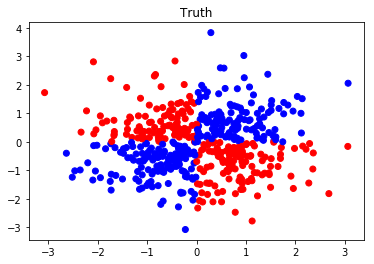

In [2]:
# pyplot is a visualization module in matplotlib.  
import matplotlib.pyplot as plt

# Generating random samples of two different classes
x_train, y_train = gen_data()

plt.scatter(x_train[:,0], x_train[:,1], color=[['red', 'blue'][x] for x in y_train]) #Generating a plot with these 500 points and the 
#red color corresponds to 0 and blue to 1
plt.title('Truth')
plt.show()

Display the random generated points and y

In [15]:
print(x_train[:5])

[[ 3.0614487  -0.16163742]
 [-0.33077655  0.44120818]
 [-0.85469536  2.30884105]
 [ 1.54507297  0.22325463]
 [ 0.4706234  -0.02478258]]


In [18]:
print(y_train[:5])

[0 0 0 1 0]


In [19]:
# keras is a platform for building and training neural networks. 
# Sequential is a container which stores the layers in order. 
# Think of it as a train engine to which you can keep adding train cars. train car in our context will be a layer.
# 'Dense' is a fully connected layer feedforward layer.

import keras
from keras.layers import Dense
from keras .models import Sequential 

Using TensorFlow backend.


In [20]:
# Building a perceptron model
model = Sequential()
model.add(Dense(1, input_shape=(2,), activation='sigmoid'))
model.compile(optimizer='Adam',
      loss='binary_crossentropy',
      metrics=['accuracy'])

In [21]:
# Training a perceptron model on the 2D data
model.fit(x_train, y_train, epochs=20)

Epoch 1/20
500/500 [==============================] - 0s - loss: 1.0331 - acc: 0.5020     
Epoch 2/20
500/500 [==============================] - 0s - loss: 1.0268 - acc: 0.5040     
Epoch 3/20
500/500 [==============================] - 0s - loss: 1.0206 - acc: 0.5040     
Epoch 4/20
500/500 [==============================] - 0s - loss: 1.0146 - acc: 0.5040     
Epoch 5/20
500/500 [==============================] - 0s - loss: 1.0081 - acc: 0.5040     
Epoch 6/20
500/500 [==============================] - 0s - loss: 1.0022 - acc: 0.5080     
Epoch 7/20
500/500 [==============================] - 0s - loss: 0.9961 - acc: 0.5100     
Epoch 8/20
500/500 [==============================] - 0s - loss: 0.9904 - acc: 0.5100     
Epoch 9/20
500/500 [==============================] - 0s - loss: 0.9846 - acc: 0.5100     
Epoch 10/20
500/500 [==============================] - 0s - loss: 0.9787 - acc: 0.5100     
Epoch 11/20
500/500 [==============================] - 0s - loss: 0.9730 - acc: 0.5100   

In [22]:
# Generating test data
x_test, y_test = gen_data(1000)

# Predicting the class label for the test data
plt.rcParams['figure.figsize'] = 8, 4
preds = model.predict_classes(x_test).reshape(-1,).astype(np.int8)

  32/1000 [..............................] - ETA: 0s

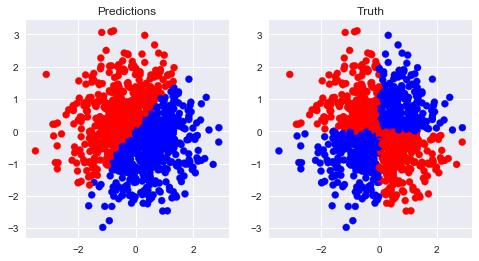

In [23]:
# Ploting the predictions of the perceptron model against ground truth
plt.subplot(121)
plt.scatter(x_test[:,0], x_test[:,1], color=[['red', 'blue'][x] for x in preds])
plt.title('Predictions')
plt.subplot(122)
plt.scatter(x_test[:,0], x_test[:,1], color=[['red', 'blue'][x] for x in y_test])
plt.title('Truth')
plt.show()

In [32]:
# Building an MLP model with single hidden layer
model2 = Sequential()
model2.add(Dense(8, input_shape=(2,), activation='sigmoid'))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(optimizer='Adam',
      loss='binary_crossentropy',
      metrics=['accuracy'])

In [33]:
# Training the MLP on the 2D data
model2.fit(x_train, y_train, epochs=100)

Epoch 1/100
500/500 [==============================] - 0s - loss: 0.7547 - acc: 0.4700     
Epoch 2/100
500/500 [==============================] - 0s - loss: 0.7429 - acc: 0.4780     
Epoch 3/100
500/500 [==============================] - 0s - loss: 0.7323 - acc: 0.4900     
Epoch 4/100
500/500 [==============================] - 0s - loss: 0.7240 - acc: 0.5040     
Epoch 5/100
500/500 [==============================] - 0s - loss: 0.7175 - acc: 0.5400     
Epoch 6/100
500/500 [==============================] - 0s - loss: 0.7118 - acc: 0.5660     
Epoch 7/100
500/500 [==============================] - 0s - loss: 0.7075 - acc: 0.5840     
Epoch 8/100
500/500 [==============================] - 0s - loss: 0.7042 - acc: 0.6060     
Epoch 9/100
500/500 [==============================] - 0s - loss: 0.7015 - acc: 0.5880     
Epoch 10/100
500/500 [==============================] - 0s - loss: 0.6994 - acc: 0.5940     
Epoch 11/100
500/500 [==============================] - 0s - loss: 0.6980 - acc

  32/1000 [..............................] - ETA: 0s

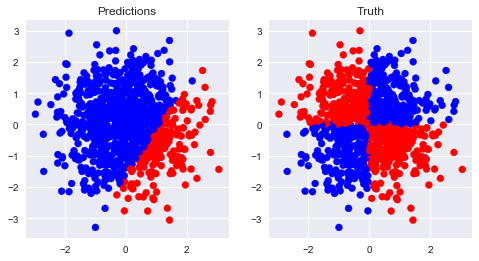

In [42]:
# Generating test data
x_test, y_test = gen_data(1000)

# Predicting labels using the MLP model
plt.rcParams['figure.figsize'] = 8, 4
preds = model2.predict_classes(x_test).reshape(-1,).astype(np.int8)

# Ploting the predictions against the ground truth labels
plt.subplot(121)
plt.scatter(x_test[:,0], x_test[:,1], color=[['red', 'blue'][x] for x in preds])
plt.title('Predictions')
plt.subplot(122)
plt.scatter(x_test[:,0], x_test[:,1], color=[['red', 'blue'][x] for x in y_test])
plt.title('Truth')
plt.show()

In [40]:
model2.predict_classes(x_test).reshape(-1).dtype

  32/1000 [..............................] - ETA: 0s

dtype('int32')

### Tensorflow Playground
http://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.33901&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false